# Introduction to embeddings

In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

In [2]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

### Samples

The example sentences feature two topics:
* Late 80s pop sensations from the UK (sample 1, 2 and 6)
* Embedding model architecture basics (sample 3 and 4)

Then there is a small control group of n=1 about Jimmy Page

In [3]:
sentences = [
    "Rick Astley is a British singer, songwriter, and radio personality born on February 6, 1966, in Newton-le-Willows, Lancashire, England.",
    "In 1987, Astley released his debut single, Never Gonna Give You Up, which became an international hit, reaching number one in 25 countries.",
    "Prolific in creating guitar riffs, Page's style involves various alternative guitar tunings and melodic solos, coupled with aggressive, distorted guitar tones.",
    "The transformer is a deep learning architecture that was developed by researchers at Google and is based on the multi-head attention mechanism, which was proposed in the 2017 paper Attention Is All You Need.",
    "Bidirectional encoder representations from transformers (BERT) is a language model introduced in October 2018 by researchers at Google.",
    "Consisting of the vocalist Neil Tennant and the keyboardist Chris Lowe, they have sold more than 100 million records worldwide[4] and were listed as the most successful duo in UK music history in the 1999 edition of The Guinness Book of Records."
]

In [4]:
embeddings = model.encode(sentences)

In [5]:
embeddings.shape

(6, 384)

### Visualization

To visualize the embeddings, we reduce dimensionality to 2, using PCA. This is just for very simple intuition - the approach shown here has lots of issues but hopefully suffices for the sake of the demonstration.

In [6]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
reduced_embeddings

array([[-0.49089625, -0.06384989],
       [-0.5654345 , -0.257033  ],
       [ 0.03060951,  0.86397237],
       [ 0.70519626, -0.19526456],
       [ 0.66533864, -0.1834968 ],
       [-0.34481367, -0.1643281 ]], dtype=float32)

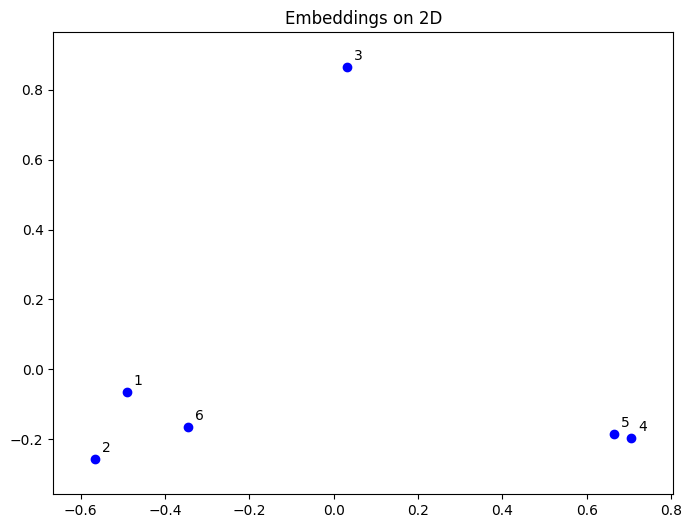

In [7]:
x = reduced_embeddings[:, 0]
y = reduced_embeddings[:, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', marker='o')

# Set labels and title
plt.title('Embeddings on 2D')

# Adjust the plot limits for better visualization
plt.xlim(min(x) - 0.1, max(x) + 0.1)
plt.ylim(min(y) - 0.1, max(y) + 0.1)

# Add row numbers as labels
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'{i+1}', (xi, yi), xytext=(5, 5), textcoords='offset points')

# Show the plot
plt.show()

### Similarities

This demonstrates different ways to calculate cosine similarity between embeddings.

In [8]:
similarities = model.similarity(embeddings, embeddings)
similarities

tensor([[ 1.0000,  0.4605,  0.1645, -0.0489,  0.0055,  0.2267],
        [ 0.4605,  1.0000,  0.0787, -0.0804, -0.0384,  0.3038],
        [ 0.1645,  0.0787,  1.0000,  0.0813,  0.0994,  0.1131],
        [-0.0489, -0.0804,  0.0813,  1.0000,  0.4668,  0.0135],
        [ 0.0055, -0.0384,  0.0994,  0.4668,  1.0000, -0.0055],
        [ 0.2267,  0.3038,  0.1131,  0.0135, -0.0055,  1.0000]])

In [9]:
F.cosine_similarity(
    torch.tensor(embeddings[3]).unsqueeze(0), 
    torch.tensor(embeddings[4]).unsqueeze(0)
)

tensor([0.4668])

In [10]:
vector1 = torch.tensor(embeddings[0]).flatten()
vector2 = torch.tensor(embeddings[1]).flatten()
# Compute dot product
dot_product = torch.dot(vector1, vector2)

# Compute magnitudes
magnitude1 = torch.sqrt(torch.sum(vector1**2))
magnitude2 = torch.sqrt(torch.sum(vector2**2))

# Compute cosine similarity
similarity = dot_product / (magnitude1 * magnitude2)
similarity

tensor(0.4605)

### Query comparison and ranking

A very straight forward and simplified semantic search

In [11]:
query = "who is rick astley?"

query_embedding = model.encode(query)
query_similarities = model.similarity(query_embedding, embeddings)

In [12]:
sorted(zip(query_similarities.tolist()[0], sentences), reverse=True)

[(0.8214718699455261,
  'Rick Astley is a British singer, songwriter, and radio personality born on February 6, 1966, in Newton-le-Willows, Lancashire, England.'),
 (0.38662296533584595,
  'In 1987, Astley released his debut single, Never Gonna Give You Up, which became an international hit, reaching number one in 25 countries.'),
 (0.22919677197933197,
  "Prolific in creating guitar riffs, Page's style involves various alternative guitar tunings and melodic solos, coupled with aggressive, distorted guitar tones."),
 (0.20177322626113892,
  'Consisting of the vocalist Neil Tennant and the keyboardist Chris Lowe, they have sold more than 100 million records worldwide[4] and were listed as the most successful duo in UK music history in the 1999 edition of The Guinness Book of Records.'),
 (0.0815008133649826,
  'Bidirectional encoder representations from transformers (BERT) is a language model introduced in October 2018 by researchers at Google.'),
 (0.026798466220498085,
  'The transfor